## BA Project Part 1: Data Collection

we have to scrap the data for the project

specification
  - 4 years of reviews dated from 2019-2023
  - Total pages scraped : 38
  - Reviews per page: 100

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import string

In [ ]:
# a function for fetch and save the data

def fetch_and_save_to_file(url, path):
    r = requests.get(url)
    folder, file = os.path.split(path)
    os.makedirs(folder, exist_ok=True)
    with open(path, "w") as f:
        f.write(r.text)

In [ ]:
# the format of source data url

URL_FORMAT = "https://www.airlinequality.com/airline-reviews/british-airways/page/{pageno}/?sortby=post_date%3ADesc&pagesize=100"

In [ ]:
%%time
# performing the scrapping

def perform_scrap(pages = 38,
                  verbose=1
                  ) -> None:
  for i in range(1, pages+1):
    url = URL_FORMAT.format(pageno=str(i))
    file_path = f"data/Reviews_page_{i}.html"
    fetch_and_save_to_file(url, file_path)
    if verbose:
      print(f"HTML saved for page {i}.")

perform_scrap()

HTML saved for page 1.
HTML saved for page 2.
HTML saved for page 3.
HTML saved for page 4.
HTML saved for page 5.
HTML saved for page 6.
HTML saved for page 7.
HTML saved for page 8.
HTML saved for page 9.
HTML saved for page 10.
HTML saved for page 11.
HTML saved for page 12.
HTML saved for page 13.
HTML saved for page 14.
HTML saved for page 15.
HTML saved for page 16.
HTML saved for page 17.
HTML saved for page 18.
HTML saved for page 19.
HTML saved for page 20.
HTML saved for page 21.
HTML saved for page 22.
HTML saved for page 23.
HTML saved for page 24.
HTML saved for page 25.
HTML saved for page 26.
HTML saved for page 27.
HTML saved for page 28.
HTML saved for page 29.
HTML saved for page 30.
HTML saved for page 31.
HTML saved for page 32.
HTML saved for page 33.
HTML saved for page 34.
HTML saved for page 35.
HTML saved for page 36.
HTML saved for page 37.
HTML saved for page 38.
CPU times: user 5.66 s, sys: 174 ms, total: 5.83 s
Wall time: 43.6 s


In [ ]:
# getting data from the web

def get_data(
    pages = 38
    ) -> pd.DataFrame:
  reviews = []
  for i in range(1, pages+1):
    file_path = f"data/Reviews_page_{i}.html"

    with open(file_path, "r") as f:
        html_content = f.read()

    soup = BeautifulSoup(html_content, 'html.parser')

    review_containers = soup.find_all('div', class_='body')

    for container in review_containers:
        review = {}

        title_element = container.find('h2', class_='text_header')
        review['review'] = title_element.text.strip() if title_element else None
        review['body'] = container.find('div', itemprop='reviewBody').text.strip()

        reviews.append(review)

  df = pd.DataFrame(reviews)
  return df

In [ ]:
df = get_data()
df.sample(10)

,review,body
3601,British Airways customer review,CPH-LHR 26th June. Club Europe. BA standards a...
3051,British Airways customer review,Heathrow to Bilbao. This is one of BA's new ro...
1142,"""IFE was the size of my wallet""",✅ Trip Verified | Washington to Frankfurt via...
1225,"""nearly three hours late""",✅ Trip Verified | London to Istanbul. Due to ...
1724,"""what you expect from a budget carrier""",✅ Verified Review | British Airways from Aber...
609,"""BA has failed completely""",✅ Trip Verified | London to Frankfurt. I made...
3031,British Airways customer review,LHR-EZE business class on board B777. Tired ol...
1493,"""used to be a nice airline""",✅ Verified Review | BA used to be a nice airli...
1502,"""clean plane, punctual service, pleasant cabin...",✅ Verified Review | I flew from London Heathr...
1749,"""if possible never fly BA again""",✅ Verified Review | Punta Cana to Gatwick ret...


In [ ]:
df.tail()

,review,body
3734,British Airways customer review,Flight from Heathrow to Toronto. Booked emerge...
3735,British Airways customer review,LHR to HAM. Purser addresses all club passenge...
3736,British Airways customer review,My son who had worked for British Airways urge...
3737,British Airways customer review,London City-New York JFK via Shannon on A318 b...
3738,British Airways customer review,SIN-LHR BA12 B747-436 First Class. Old aircraf...


Congratulation, you have finished the data ingestion part ♥

## BA Project Phase 2: Data Cleaning

- Removing unncessary columns
- Changing Dtypes for data size optimization and further processing
- Determining missing values
- Removing Punctuation and Quotaion marks for further processing
- Renaming columns

In [ ]:
# is there any missing values ??

df.isna().any()

review    False
body      False
dtype: bool

In [ ]:
# what is the shape of the data

df.shape

(3739, 2)

In [ ]:
# need some more info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3739 non-null   object
 1   body    3739 non-null   object
dtypes: object(2)
memory usage: 58.5+ KB


In [ ]:
# cleaning

unneccessory_words = ["Not Verified", "Trip Verified", "British Airways customer review"]

def remove_punctuation_and_quotes(text):
    text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
    text_no_quotes = text_no_punct.replace('“', '').replace('”', '').replace('"', '')
    text_no_quotes = text_no_quotes.replace("✅", "")
    for word in unneccessory_words:
      text_no_quotes = text_no_quotes.replace(word, "")
    return text_no_quotes

df['review'] = df['review'].apply(remove_punctuation_and_quotes)
df['body'] = df['body'].apply(remove_punctuation_and_quotes)
df.sample(10)

,review,body
2089,used to be such a class act,New York JFK to London Heathrow with British A...
1053,most uncomfortable plane,Gatwick to Tenerife This aircraft either ne...
1112,BA club world is a farce,London to Los Angeles Booked this trip eig...
1944,tired grey Boeing 777 interior,Verified Review London Heathrow to Lima Aft...
3327,,LHRVIE in Club Europe on A320 Plane was an exB...
3019,,MadridLondon City return Excellent experience ...
1756,nothing more than nofrills airline,Verified Review Gatwick to Rome return Outw...
2456,good food and drink,An excellent flight from Atlanta to London wit...
3196,,London Gatwick to Mauritius 27th December retu...
3681,,BA Heathrow to Madrid Club Euro Disappointing ...


In [ ]:
df.tail()

,review,body
3734,,Flight from Heathrow to Toronto Booked emergen...
3735,,LHR to HAM Purser addresses all club passenger...
3736,,My son who had worked for British Airways urge...
3737,,London CityNew York JFK via Shannon on A318 bu...
3738,,SINLHR BA12 B747436 First Class Old aircraft 1...


In [ ]:
# combining both

combined = pd.DataFrame(df["review"] + df["body"], columns=["review"])

In [ ]:
combined

,review
0,unprofessional attitude of the pilots BA 24...
1,Next time it will be Jet2 Not a great experi...
2,become the Ryanair of longhaul travel I was e...
3,They never help us I just want to warn every...
4,uncomfortable seat and disgusting food Paid f...
...,...
3734,Flight from Heathrow to Toronto Booked emergen...
3735,LHR to HAM Purser addresses all club passenger...
3736,My son who had worked for British Airways urge...
3737,London CityNew York JFK via Shannon on A318 bu...


In [ ]:
%%time

# finding the sentiment
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('all', quiet=True)

model = SentimentIntensityAnalyzer()

# Filtering words based on sentiment score
combined['nltk_sentiment_score'] = combined['review'].apply(lambda x: model.polarity_scores(x)['compound'])
combined

CPU times: user 8.14 s, sys: 27.7 ms, total: 8.17 s
Wall time: 8.36 s


,review,nltk_sentiment_score
0,unprofessional attitude of the pilots BA 24...,-0.7234
1,Next time it will be Jet2 Not a great experi...,0.8659
2,become the Ryanair of longhaul travel I was e...,0.4770
3,They never help us I just want to warn every...,-0.9354
4,uncomfortable seat and disgusting food Paid f...,-0.9753
...,...,...
3734,Flight from Heathrow to Toronto Booked emergen...,-0.6562
3735,LHR to HAM Purser addresses all club passenger...,0.8720
3736,My son who had worked for British Airways urge...,0.4516
3737,London CityNew York JFK via Shannon on A318 bu...,0.9148


In [ ]:
# manually checking some of the data points
from pprint import pprint

def show(num):
  pprint(combined.iloc[num])
  pprint(combined.iloc[num]["review"])

# test1
show(35)

review                  I was pleasantly surprised    Having not flown...
nltk_sentiment_score                                                0.653
Name: 35, dtype: object
('I was pleasantly surprised    Having not flown with BA for a few years I '
 'read some of the reviews in preparation needless to say I boarded this '
 'flight with low expectations I was pleasantly surprised as the flight was ok '
 'We left LHR a few minutes early and arrived at JNB ahead of schedule Cabin '
 'crew although not as good as some carriers were attentive and professional '
 'Onboard catering was a disappointment as if you were unlucky to miss out on '
 'the chicken you were given a very sloppy pasta On board entertainment has '
 'never been BAs strong point and sadly that hasnt changed Unfortunately BA is '
 'not the prestigious carrier it once was but its not as bad from my '
 'experience as some reviews suggest')


In [ ]:
# test 2
show(432)

review                  thank you for the great service    I would lik...
nltk_sentiment_score                                               0.9906
Name: 432, dtype: object
('thank you for the great service    I would like to thank you for the great '
 'service I am a handicap and my family and I were afraid of this trip because '
 'I was flying alone and had a layover in London of a few hours I had to '
 'change terminals and everything but thanks to a great service my trip was '
 'amazing They took great care of me and made sure I was doing well throughout '
 'the whole flight')


In [ ]:
# test3
show(535)

review                  could not have asked for better service    Upo...
nltk_sentiment_score                                               0.9136
Name: 535, dtype: object
('could not have asked for better service    Upon checking in at the Club desk '
 'in Lisbon airport our Passenger Locator Forms were found to have an '
 'incorrect reference number for our Day 2 test and the check in agent denied '
 'us boarding causing my wife who had recently spent some long time in '
 'hospital in the UK much distress He was only doing his job of course but we '
 'requested him to call a Supervisor The Check in Manager Goncalo Ribeiro came '
 'to our rescue  Not only did he identify the problem but spent half an hour '
 'of his time arranging a new supplier for our Day 2 test uploading it onto '
 'our PLF’s verifying our flight documentation and fast tracking us through '
 'checkin He was at the Gate on boarding to wish us a comfortable journey we '
 'could not have asked for better service He w

## BA Project Phase 3: Insight & Visualization

In [ ]:
# Classifying sentiment based on compound score
df['sentiment_class'] = combined['nltk_sentiment_score'].apply(lambda x: 'Positive' if x > 0.01 else ('Negative' if x < -0.01 else 'Neutral'))

# Counting the number of reviews in each sentiment class
sentiment_counts = df['sentiment_class'].value_counts()
print(sentiment_counts)

Positive    2172
Negative    1553
Neutral       14
Name: sentiment_class, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

def build_word_cloud():
  positive_words = ' '.join(combined[combined['nltk_sentiment_score'] > 0]['review'])
  negative_words = ' '.join(combined[combined['nltk_sentiment_score'] < 0]['review'])
  stop_words = set(stopwords.words('english') + list(STOPWORDS))
  wordcloud_positive = WordCloud(stopwords=stop_words, background_color='white').generate(positive_words)
  wordcloud_negative = WordCloud(stopwords=stop_words, background_color='white').generate(negative_words)

  return wordcloud_positive, wordcloud_negative

wordcloud_positive, wordcloud_negative = build_word_cloud()

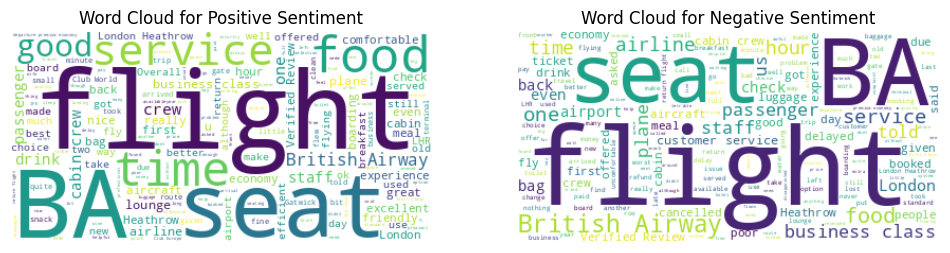

In [ ]:
# Plotting Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')

plt.show()

In [ ]:
def percentage_sentiment(
    df,
    sentiment_counts,
    show=True,
    ):
  total_reviews = len(combined)
  percentage_positive = (sentiment_counts['Positive'] / total_reviews) * 100
  percentage_negative = (sentiment_counts['Negative'] / total_reviews) * 100
  percentage_neutral = (sentiment_counts['Neutral'] / total_reviews) * 100

  if show:
    print(f"Percentage of Positive Reviews: {percentage_positive:.2f}%")
    print(f"Percentage of Negative Reviews: {percentage_negative:.2f}%")
    print(f"Percentage of Neutral Reviews: {percentage_neutral:.2f}%")

  return {
      'positive': percentage_positive,
      'negative': percentage_negative,
      'neutral': percentage_neutral,
      }

percentages = percentage_sentiment(combined, sentiment_counts)

Percentage of Positive Reviews: 58.09%
Percentage of Negative Reviews: 41.54%
Percentage of Neutral Reviews: 0.37%


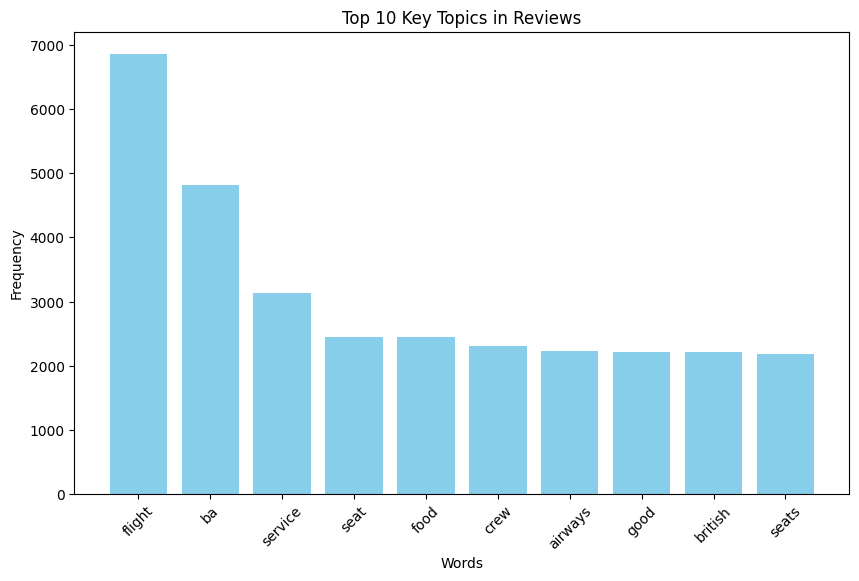

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def n_key_topics(n=10):
  reviews = combined['review']
  all_text = ' '.join(reviews)
  tokens = word_tokenize(all_text)
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
  freq_dist = FreqDist(filtered_tokens)
  top_words = freq_dist.most_common(n)
  return top_words

n = 10
top_words = n_key_topics(n)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_words), color='skyblue')
plt.title(f'Top {n} Key Topics in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Thanks a lot ♥